Processando arquivo: teste2.npy

--- Testando arquitetura: (10,) ---
  -> Erro Quadrático Médio (MSE) após 10 execuções:
     - Média: 0.12879808
     - Desvio Padrão: 0.00823345
  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.

--- Testando arquitetura: (32, 16) ---
  -> Erro Quadrático Médio (MSE) após 10 execuções:
     - Média: 0.12188152
     - Desvio Padrão: 0.00242969
  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.

--- Testando arquitetura: (64, 32, 16) ---
  -> Erro Quadrático Médio (MSE) após 10 execuções:
     - Média: 0.11855977
     - Desvio Padrão: 0.00090129
  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.

--- Melhor resultado para 'teste2.npy' foi com a arquitetura: (64, 32, 16) ---


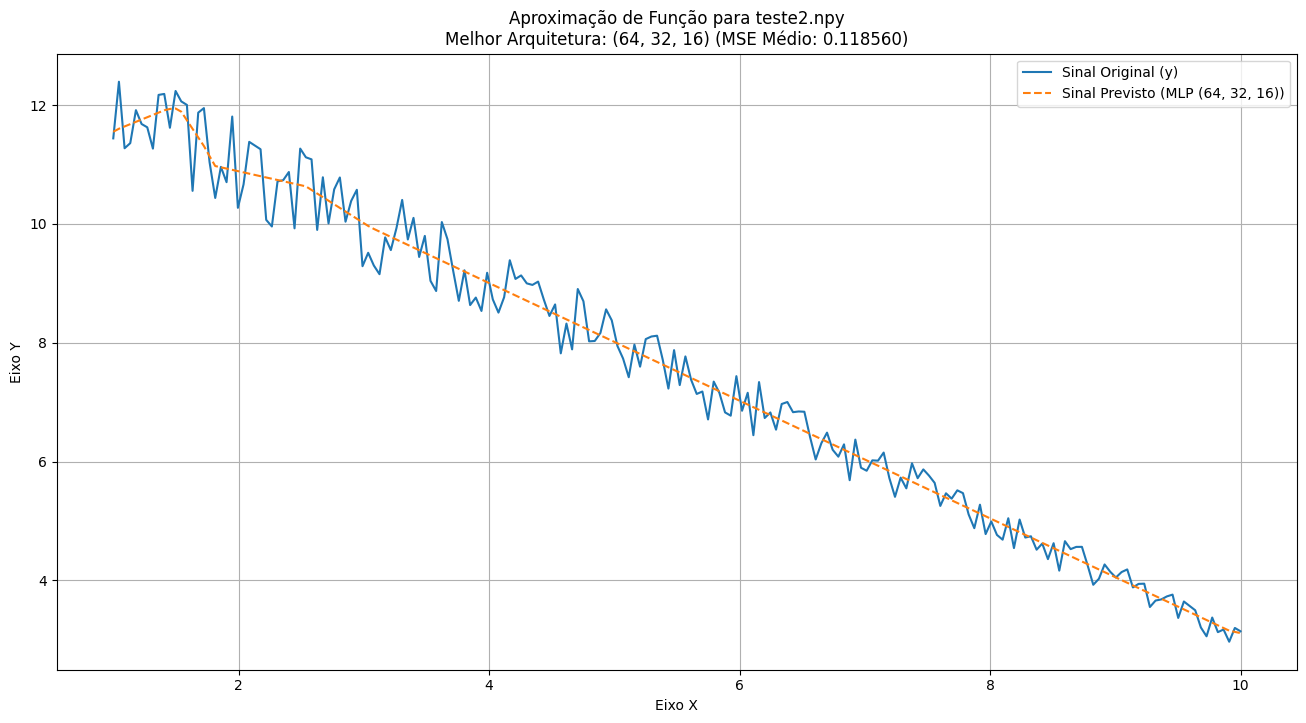

Processando arquivo: teste3.npy

--- Testando arquitetura: (10,) ---
  -> Erro Quadrático Médio (MSE) após 10 execuções:
     - Média: 24.38085102
     - Desvio Padrão: 13.38585032
  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.

--- Testando arquitetura: (32, 16) ---
  -> Erro Quadrático Médio (MSE) após 10 execuções:
     - Média: 0.70554934
     - Desvio Padrão: 0.11468819
  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.

--- Testando arquitetura: (64, 32, 16) ---
  -> Erro Quadrático Médio (MSE) após 10 execuções:
     - Média: 0.57483976
     - Desvio Padrão: 0.01302487
  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.

--- Melhor resultado para 'teste3.npy' foi com a arquitetura: (64, 32, 16) ---


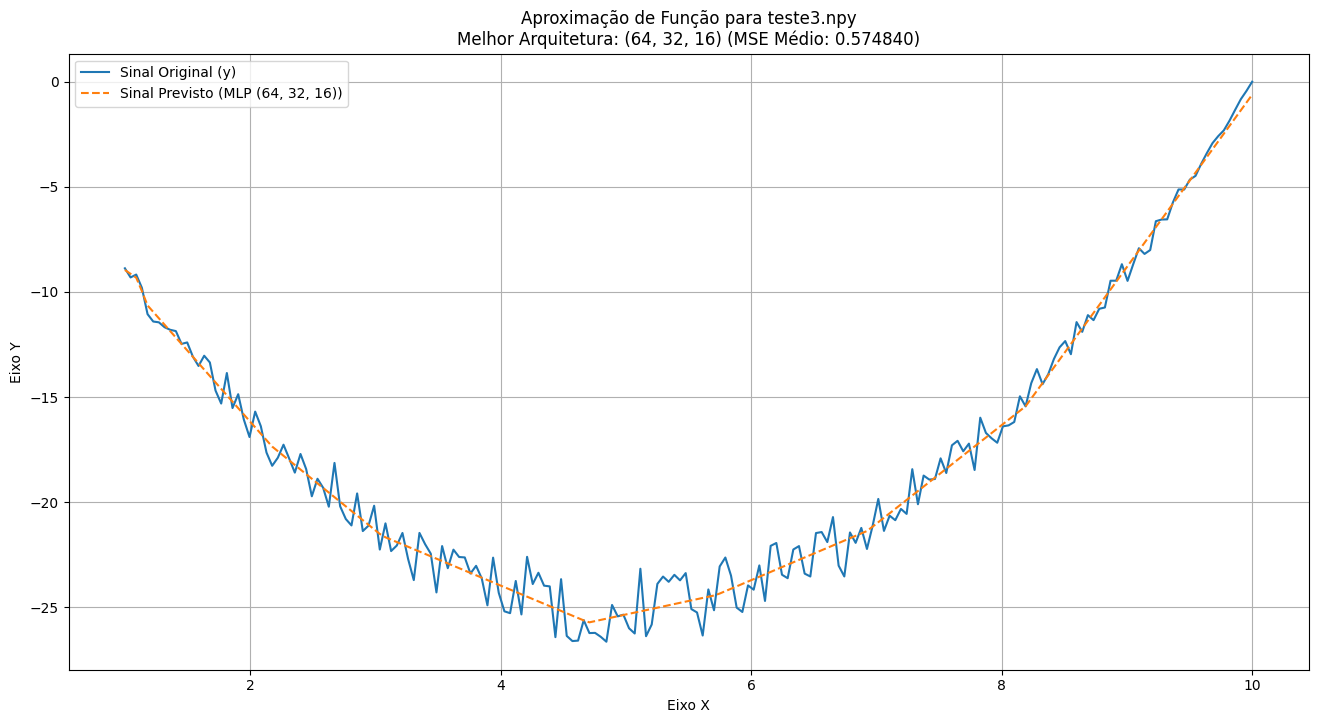

Processando arquivo: teste4.npy

--- Testando arquitetura: (10,) ---
  -> Erro Quadrático Médio (MSE) após 10 execuções:
     - Média: 6304.59336705
     - Desvio Padrão: 548.97478731
  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.

--- Testando arquitetura: (32, 16) ---
  -> Erro Quadrático Médio (MSE) após 10 execuções:
     - Média: 108.08569223
     - Desvio Padrão: 140.81133054
  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.

--- Testando arquitetura: (64, 32, 16) ---
  -> Erro Quadrático Médio (MSE) após 10 execuções:
     - Média: 43.81287852
     - Desvio Padrão: 96.96676682
  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.

--- Melhor resultado para 'teste4.npy' foi com a arquitetura: (64, 32, 16) ---


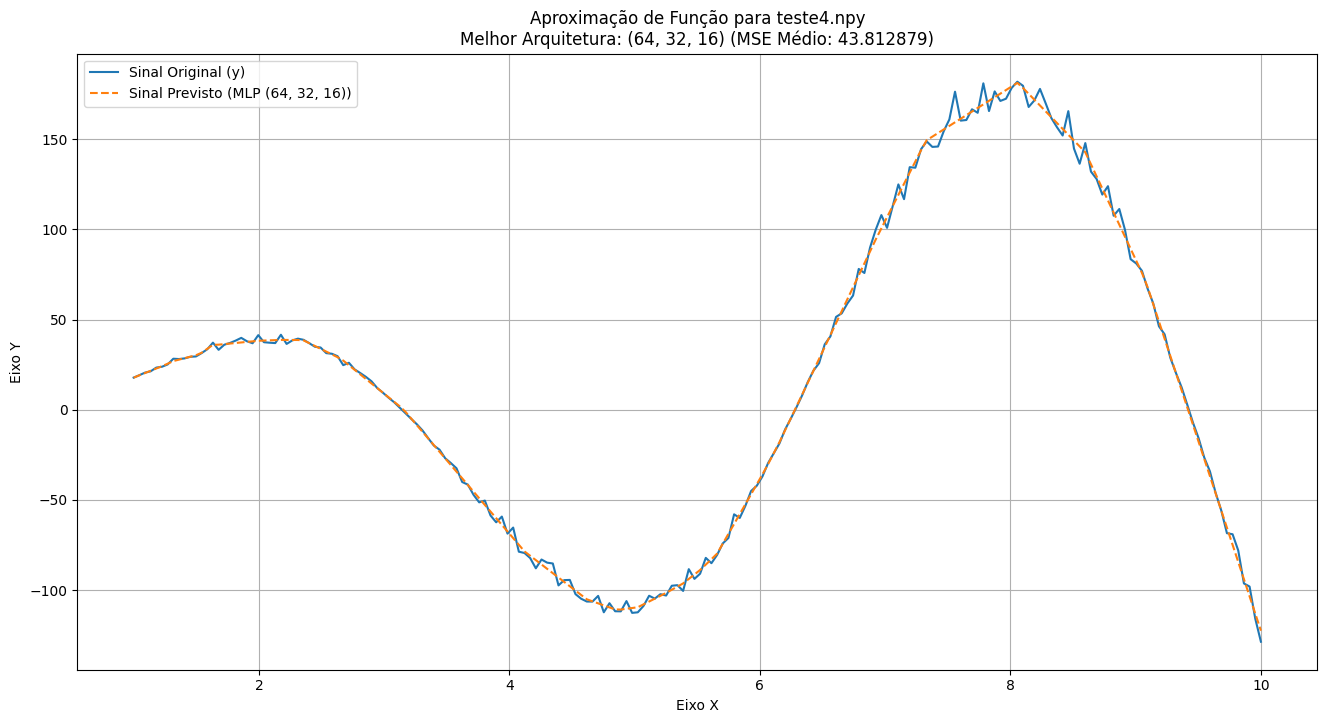

Processando arquivo: teste5.npy

--- Testando arquitetura: (10,) ---
  -> Erro Quadrático Médio (MSE) após 10 execuções:
     - Média: 9547.53114448
     - Desvio Padrão: 71.82589447
  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.

--- Testando arquitetura: (32, 16) ---
  -> Erro Quadrático Médio (MSE) após 10 execuções:
     - Média: 9098.05743412
     - Desvio Padrão: 229.93640287
  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.

--- Testando arquitetura: (64, 32, 16) ---
  -> Erro Quadrático Médio (MSE) após 10 execuções:
     - Média: 8177.55581337
     - Desvio Padrão: 663.71267447
  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.

--- Melhor resultado para 'teste5.npy' foi com a arquitetura: (64, 32, 16) ---


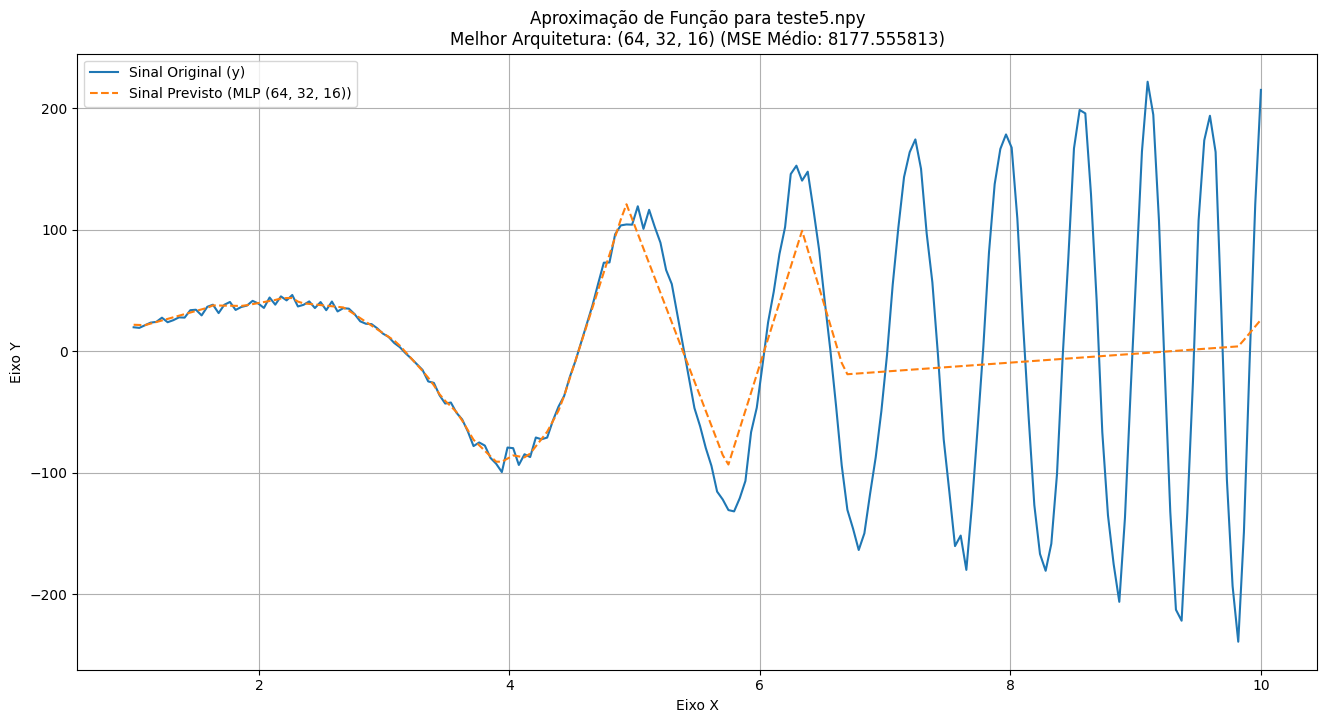


Análise concluída para todos os arquivos!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import warnings

# Ignorar avisos de convergência para manter a saída limpa durante as múltiplas execuções
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# --- PARÂMETROS DE CONFIGURAÇÃO ---

# Lista de arquivos a serem processados, conforme solicitado no relatório
arquivos_de_teste = [
    'teste2.npy',
    'teste3.npy',
    'teste4.npy',
    'teste5.npy'
]

# Pelo menos 3 arquiteturas para simulação.
# A tupla representa as camadas ocultas e seus neurônios.
# Ex: (10,) -> 1 camada oculta com 10 neurônios
# Ex: (20, 10) -> 2 camadas ocultas, a primeira com 20 e a segunda com 10 neurônios
arquiteturas_para_simular = [
    (10,),              # Arquitetura 1: Simples
    (32, 16),           # Arquitetura 2: Intermediária
    (64, 32, 16)        # Arquitetura 3: Mais complexa
]

# Número de execuções para cada arquitetura para calcular média e desvio padrão
num_execucoes = 10

# --- LÓGICA PRINCIPAL ---

# Itera sobre cada arquivo da lista
for nome_arquivo in arquivos_de_teste:
    print(f"======================================================")
    print(f"Processando arquivo: {nome_arquivo}")
    print(f"======================================================")

    # Carrega os dados do arquivo .npy
    try:
        dados = np.load(nome_arquivo)
    except FileNotFoundError:
        print(f"--> ERRO: Arquivo '{nome_arquivo}' não encontrado. Por favor, faça o upload do arquivo.")
        continue

    # Separa os dados em x (entrada) and y (saída/alvo) [cite: 80, 81]
    x = dados[0]
    y = dados[1].ravel()  # .ravel() transforma o array de (200, 1) para (200,) que é o formato esperado pelo fit()

    # Variáveis para guardar o melhor resultado para este arquivo
    melhor_mse_medio = float('inf')
    melhor_arquitetura = None
    melhor_modelo_treinado = None

    # Itera sobre cada arquitetura definida
    for arquitetura in arquiteturas_para_simular:
        print(f"\n--- Testando arquitetura: {arquitetura} ---")

        # Lista para armazenar o erro de cada uma das 10 execuções
        erros_desta_arquitetura = []

        # Executa o treinamento 10 vezes
        for i in range(num_execucoes):
            # Cria o regressor MLP com os parâmetros do exemplo e da documentação [cite: 115, 116, 117, 118]
            # Adicionamos 'random_state' para garantir que os pesos iniciais sejam diferentes a cada chamada
            regr = MLPRegressor(
                hidden_layer_sizes=arquitetura,
                max_iter=5000,
                solver='adam',
                learning_rate='adaptive',
                n_iter_no_change=500,
                random_state=i # Usar o 'i' do loop para garantir diferentes inicializações
            )

            # Treina o modelo
            regr.fit(x, y)

            # Faz a predição com os dados de treino
            y_estimado = regr.predict(x)

            # Calcula o Erro Quadrático Médio (Mean Squared Error) e o armazena
            mse = mean_squared_error(y, y_estimado)
            erros_desta_arquitetura.append(mse)

        # Calcula a média e o desvio padrão dos erros
        media_erros = np.mean(erros_desta_arquitetura)
        desvio_padrao_erros = np.std(erros_desta_arquitetura)

        print(f"  -> Erro Quadrático Médio (MSE) após {num_execucoes} execuções:")
        print(f"     - Média: {media_erros:.8f}")
        print(f"     - Desvio Padrão: {desvio_padrao_erros:.8f}")

        # Verifica se esta arquitetura foi a melhor até agora (menor erro médio)
        if media_erros < melhor_mse_medio:
            melhor_mse_medio = media_erros
            melhor_arquitetura = arquitetura

            # Para plotar o gráfico do melhor, precisamos de um modelo treinado.
            # Vamos treinar um último modelo com esta arquitetura para usar no gráfico.
            # Usamos um random_state fixo para que o gráfico seja sempre o mesmo para a melhor arquitetura.
            print("  -> Esta é a melhor arquitetura até agora. Treinando modelo final para o gráfico.")
            melhor_modelo_treinado = MLPRegressor(
                hidden_layer_sizes=arquitetura,
                max_iter=10000,
                solver='adam',
                learning_rate='adaptive',
                n_iter_no_change=1000,
                random_state=42 # Um número fixo para reprodutibilidade do gráfico
            ).fit(x, y)


    # --- Geração do Gráfico para o melhor resultado ---
    print(f"\n--- Melhor resultado para '{nome_arquivo}' foi com a arquitetura: {melhor_arquitetura} ---")

    # Usa o melhor modelo treinado para gerar a predição final
    y_final_estimado = melhor_modelo_treinado.predict(x)

    # Configura e exibe o gráfico
    plt.figure(figsize=(16, 8))
    plt.plot(x, y, label='Sinal Original (y)')
    plt.plot(x, y_final_estimado, label=f'Sinal Previsto (MLP {melhor_arquitetura})', linestyle='--')
    plt.title(f'Aproximação de Função para {nome_arquivo}\nMelhor Arquitetura: {melhor_arquitetura} (MSE Médio: {melhor_mse_medio:.6f})')
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')
    plt.legend()
    plt.grid(True)
    plt.show()

print("\nAnálise concluída para todos os arquivos!")